In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# 1) Ler e preparar
df = pd.read_csv("/home/dario/Documentos/pymost/outputs/Sunspots.csv")
assert {"Date","Lat","Area"}.issubset(df.columns), "CSV precisa ter colunas Date, Lat, Area"
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Lat"]  = pd.to_numeric(df["Lat"], errors="coerce")
df["Area"] = pd.to_numeric(df["Area"], errors="coerce")

/tmp/ipykernel_7481/813449613.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


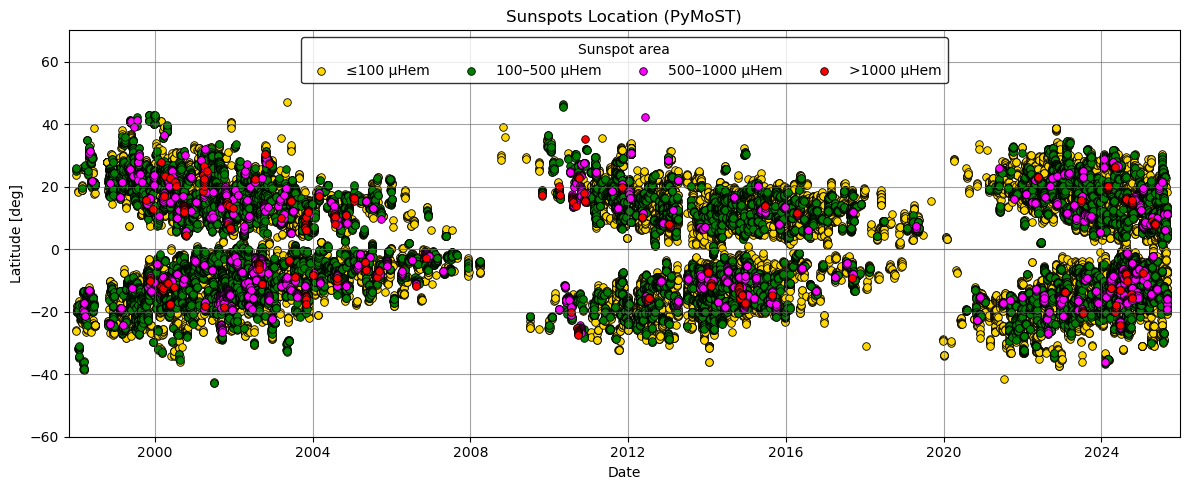

In [3]:
# 2) Categorias de área
bins   = [-float("inf"), 100, 500, 1000, float("inf")]
labels = ["≤100 μHem", "100–500 μHem", "500–1000 μHem", ">1000 μHem"]
colors = ["gold", "green", "magenta", "red"]

df["AreaClass"] = pd.cut(df["Area"], bins=bins, labels=labels, right=True, include_lowest=True)

# 3) Plot (ordem: amarelo -> verde -> magenta -> vermelho)
plt.figure(figsize=(12,5))
for lab, col in zip(labels, colors):
    sel = df["AreaClass"] == lab
    plt.scatter(df.loc[sel,"Date"], df.loc[sel,"Lat"],
                s=30,
                color=col, edgecolor="black", linewidths=0.6,
                label=lab)


plt.axhline(0, color="#666", lw=0.8, alpha=0.6)  # equador solar
plt.xlim(10160,20450)
plt.ylim(-60,70)
plt.ylabel("Latitude [deg]")
plt.xlabel("Date")
plt.title("Sunspots Location (PyMoST)")
plt.legend(title="Sunspot area",
           markerscale=1,
           frameon=True,         # ativa caixa
           fancybox=True,        # cantos arredondados
           edgecolor="black",    # borda preta
           facecolor="white",    # fundo branco para contraste
           ncol=4,
           loc="upper center",
           bbox_to_anchor=(0.5, 1.00))
plt.grid(color="#666", lw=0.8, alpha=0.6)
plt.tight_layout()
plt.savefig('Fig_7.jpeg', dpi=600, format='jpeg',  bbox_inches='tight')
plt.show()

/tmp/ipykernel_7481/1173850315.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AreaClass"] = pd.cut(df["Area"], bins=bins, labels=False)


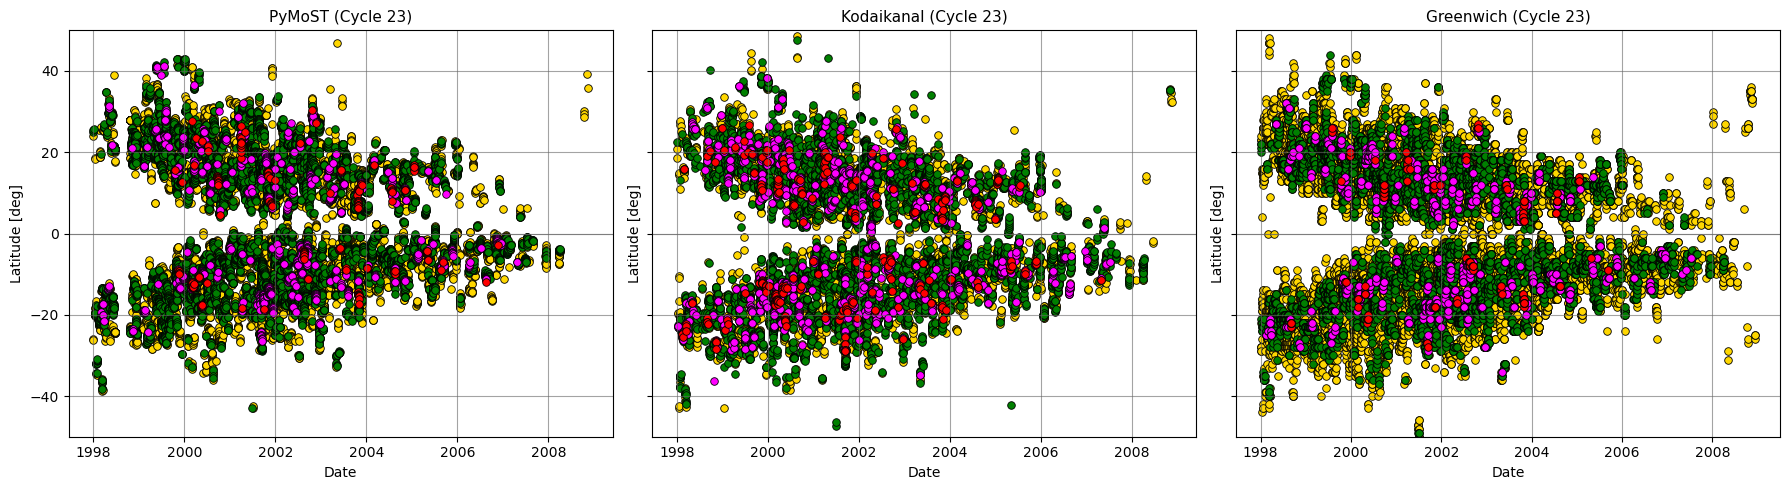

In [4]:
# ---------- PyMoST ----------
df_pymost = df
df_pymost["Date"] = pd.to_datetime(df_pymost["Date"], errors="coerce")
df_pymost["Lat"]  = pd.to_numeric(df_pymost["Lat"], errors="coerce")
df_pymost["Area"] = pd.to_numeric(df_pymost["Area"], errors="coerce")
#df_pymost = df_pymost.dropna(subset=["Date","Lat","Area"])

# ---------- Kodaikanal ----------
df_kod = pd.read_csv("/home/dario/Documentos/pymost/sample/Kodaikanal_diario.txt", sep=";")
df_kod["Date"] = pd.to_datetime(df_kod["t"].str[:10], errors="coerce")
df_kod["Lat"]  = pd.to_numeric(df_kod["la"], errors="coerce")
df_kod["Area"] = pd.to_numeric(df_kod["a"], errors="coerce")
#df_kod = df_kod.dropna(subset=["Date","Lat","Area"])

# ---------- Greenwich ----------
df_gw = pd.read_csv("/home/dario/Documentos/pymost/sample/GW_SS_Data.csv")
df_gw["Date"] = pd.to_datetime(df_gw["ano"].astype(str) + "-" +
                               df_gw["mes"].astype(str) + "-" +
                               df_gw["dia"].astype(str), errors="coerce")
df_gw["Lat"]  = pd.to_numeric(df_gw["latitude"], errors="coerce")
df_gw["Area"] = pd.to_numeric(df_gw["area"], errors="coerce")
#df_gw = df_gw.dropna(subset=["Date","Lat","Area"])

# ---------- Filtrar para o ciclo 23 (1996–2008 aprox) ----------
start, end = "1996-01-01", "2008-12-31"
df_pymost = df_pymost[(df_pymost["Date"]>=start) & (df_pymost["Date"]<=end)]
df_kod    = df_kod[(df_kod["Date"]>=start) & (df_kod["Date"]<=end)]
df_gw     = df_gw[(df_gw["Date"]>=start) & (df_gw["Date"]<=end)]

# ---------- Categorias de área ----------
bins   = [-float("inf"), 100, 500, 1000, float("inf")]
colors = ["gold", "green", "magenta", "red"]

def plot_butterfly(ax, df, title):
    df["AreaClass"] = pd.cut(df["Area"], bins=bins, labels=False)
    for i, col in enumerate(colors):
        sel = df["AreaClass"] == i
        ax.scatter(df.loc[sel,"Date"], df.loc[sel,"Lat"],
                   s=30, alpha=1,
                   color=col, edgecolor="black", linewidths=0.6)
    ax.axhline(0, color="#666", lw=0.8, alpha=0.6)
    ax.set_ylim(-50, 50)
    ax.set_title(title, fontsize=11)
    ax.set_ylabel("Latitude [deg]")
    ax.set_xlabel("Date")
    ax.grid(color="#666", lw=0.8, alpha=0.6)

# ---------- Plot lado a lado ----------
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

plot_butterfly(axes[0], df_pymost, "PyMoST (Cycle 23)")
plot_butterfly(axes[1], df_kod,    "Kodaikanal (Cycle 23)")
plot_butterfly(axes[2], df_gw,     "Greenwich (Cycle 23)")

plt.tight_layout()

plt.savefig('Fig_9.jpeg', dpi=600, format='jpeg',  bbox_inches='tight')
plt.show()

In [5]:
#%matplotlib qt

In [6]:
START = pd.Timestamp("1998-01-01")
colorset = {"PyMoST":"red", "Kodaikanal":"black", "Greenwich":"blue"}

# ------------------------------
# 1) Ler dados
# ------------------------------
# PyMoST (Sunspots.csv: Date, Lat, Area)
p = df
p = p.drop_duplicates(subset=["Date", "Lat", "Area"])

/tmp/ipykernel_7481/1430395029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p["Date"] = pd.to_datetime(p["Date"], errors="coerce")
/tmp/ipykernel_7481/1430395029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p["Lat"]  = pd.to_numeric(p.get("Lat"), errors="coerce")
/tmp/ipykernel_7481/1430395029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

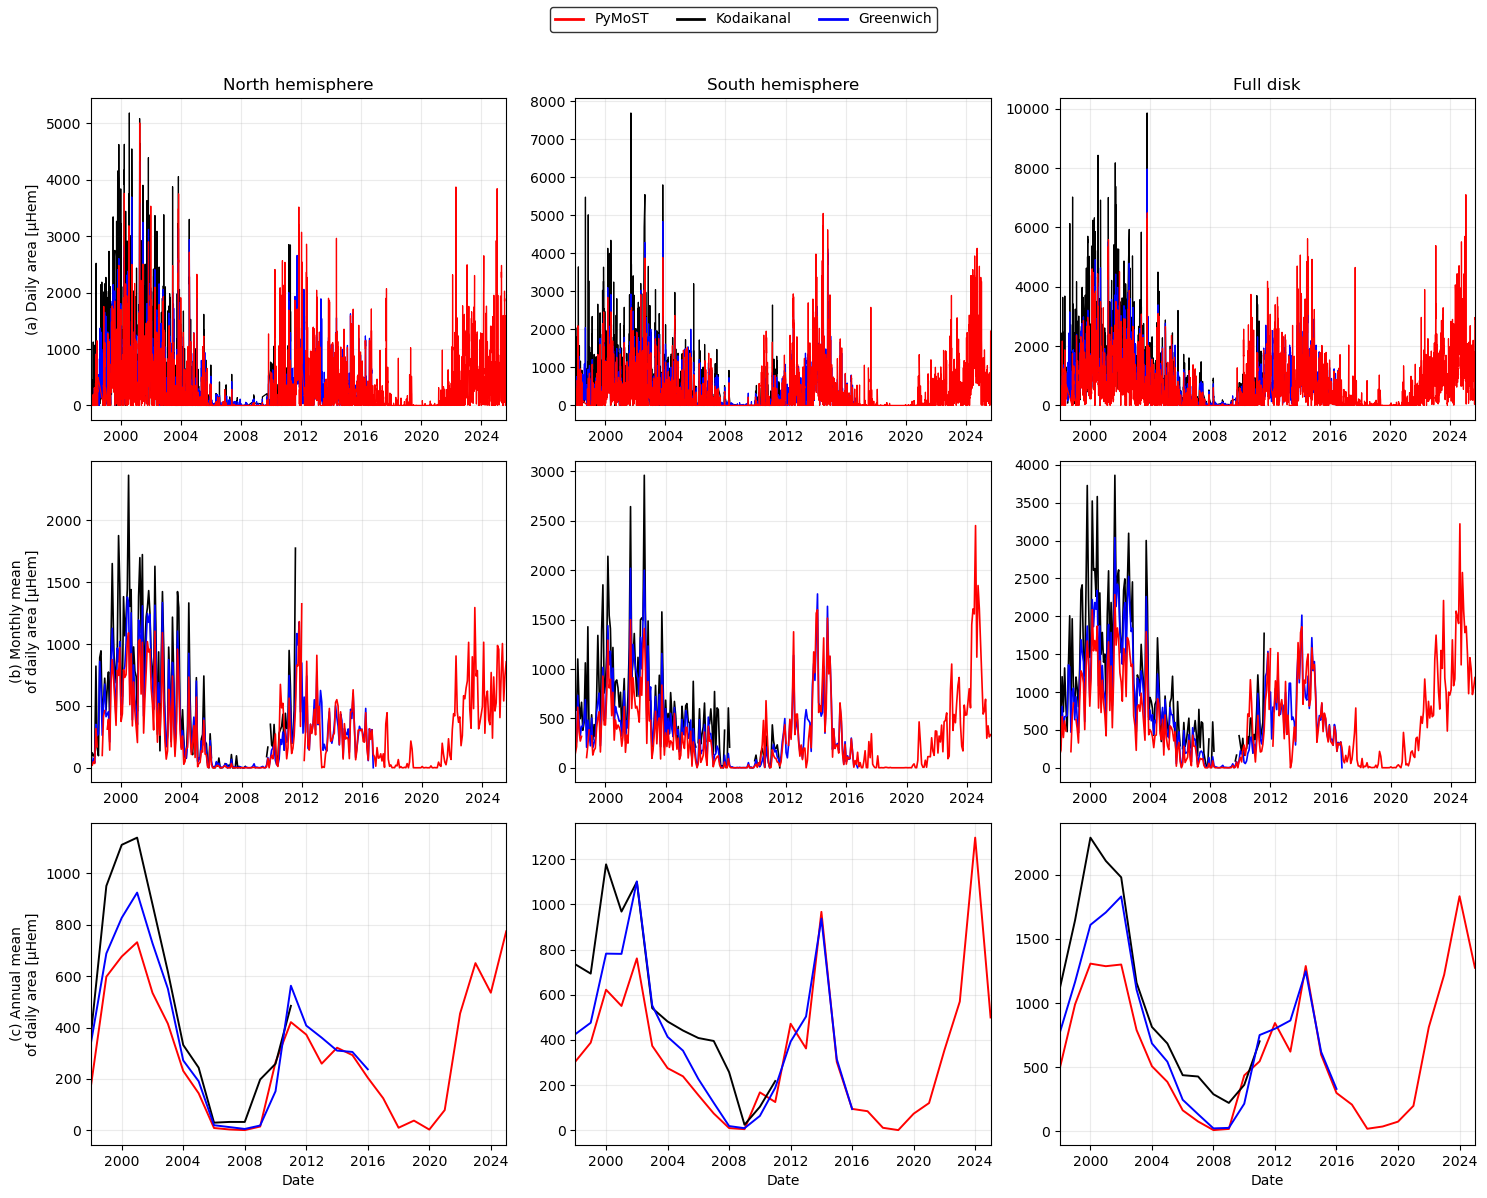

In [7]:
p["Date"] = pd.to_datetime(p["Date"], errors="coerce")
p["Lat"]  = pd.to_numeric(p.get("Lat"), errors="coerce")
p["Area"] = pd.to_numeric(p.get("Area"), errors="coerce")
#p = p.dropna(subset=["Date", "Lat", "Area"])
p["day"] = p["Date"].dt.normalize()
p = p[p["day"] >= START]

# Kodaikanal (Kodaikanal_diário.txt: t;lo;la;a) — ajuste o nome se estiver sem acento
k = pd.read_csv("Kodaikanal_diario.txt", sep=";")
k["Date"] = pd.to_datetime(k["t"].astype(str).str[:10], errors="coerce")
k["Lat"]  = pd.to_numeric(k["la"], errors="coerce")
k["Area"] = pd.to_numeric(k["a"], errors="coerce")
k = k.dropna(subset=["Date", "Lat", "Area"])
k["day"] = k["Date"].dt.normalize()
k = k[k["day"] >= START]

# Greenwich (daily_area_total.txt: YYYY MM DD Total North South) – espaço
g = pd.read_csv("daily_area_total.txt", delim_whitespace=True, header=0)
g["YYYY"] = pd.to_numeric(g["YYYY"], errors="coerce").astype("Int64")
g["MM"]   = pd.to_numeric(g["MM"],   errors="coerce").astype("Int64")
g["DD"]   = pd.to_numeric(g["DD"],   errors="coerce").astype("Int64")
g["Date"] = pd.to_datetime(dict(year=g["YYYY"], month=g["MM"], day=g["DD"]), errors="coerce")
#g = g.dropna(subset=["Date"])
g["day"] = g["Date"].dt.normalize()
for col in ["Total","North","South"]:
    g[col] = pd.to_numeric(g[col], errors="coerce")
g = g[g["day"] >= START]

# ------------------------------
# 2) Agregar por dia (N, S, Total)
# ------------------------------
def daily_by_hemi(df, lat_col="Lat", area_col="Area", day_col="day"):
    north = df.loc[df[lat_col] >= 0].groupby(day_col)[area_col].sum().rename("North")
    south = df.loc[df[lat_col] <  0].groupby(day_col)[area_col].sum().rename("South")
    total = df.groupby(day_col)[area_col].sum().rename("Total")
    return pd.concat([north, south, total], axis=1).fillna(0.0).sort_index()

p_daily = daily_by_hemi(p)
k_daily = daily_by_hemi(k)
g_daily = g.set_index("day")[["North","South","Total"]].astype(float).sort_index()

# ------------------------------
# 3) Mensal (média da área diária) e Anual
# ------------------------------
p_month = p_daily.resample("MS").mean()
k_month = k_daily.resample("MS").mean()
g_month = g_daily.resample("MS").mean()

p_year = p_daily.resample("YS").mean()
k_year = k_daily.resample("YS").mean()
g_year = g_daily.resample("YS").mean()

# ------------------------------
# 4) ÚNICA figura 3×3 (sem share para cada painel ter seu zoom)
# ------------------------------
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # <<< remova sharex/sharey

# helper para ajustar xlim de cada painel conforme as séries daquele painel
def autolims(ax, series_list):
    # junta os índices (datas) de todas as séries não-vazias
    idx_min = None
    idx_max = None
    for s in series_list:
        if s is not None and hasattr(s, "index") and len(s) > 0:
            s = s.dropna()
            if len(s) == 0:
                continue
            m0, m1 = s.index.min(), s.index.max()
            idx_min = m0 if idx_min is None or m0 < idx_min else idx_min
            idx_max = m1 if idx_max is None or m1 > idx_max else idx_max
    if idx_min is not None and idx_max is not None:
        ax.set_xlim(idx_min, idx_max)

# títulos das colunas
col_titles = ["North hemisphere", "South hemisphere", "Full disk"]

# linha 1: DIÁRIO
axes[0,0].set_title(col_titles[0])
axes[0,1].set_title(col_titles[1])
axes[0,2].set_title(col_titles[2])

axes[0,0].plot(k_daily.index, k_daily["North"], color=colorset["Kodaikanal"], lw=0.9, label="Kodaikanal")
axes[0,0].plot(g_daily.index, g_daily["North"], color=colorset["Greenwich"], lw=0.9, label="Greenwich")
axes[0,0].plot(p_daily.index, p_daily["North"], color=colorset["PyMoST"], lw=0.9, label="PyMoST")
axes[0,0].set_ylabel("(a) Daily area [μHem]")
autolims(axes[0,0], [k_daily["North"], g_daily["North"], p_daily["North"]])

axes[0,1].plot(k_daily.index, k_daily["South"], color=colorset["Kodaikanal"], lw=0.9)
axes[0,1].plot(g_daily.index, g_daily["South"], color=colorset["Greenwich"], lw=0.9)
axes[0,1].plot(p_daily.index, p_daily["South"], color=colorset["PyMoST"], lw=0.9)
autolims(axes[0,1], [k_daily["South"], g_daily["South"], p_daily["South"]])

axes[0,2].plot(k_daily.index, k_daily["Total"], color=colorset["Kodaikanal"], lw=0.9)
axes[0,2].plot(g_daily.index, g_daily["Total"], color=colorset["Greenwich"], lw=0.9)
axes[0,2].plot(p_daily.index, p_daily["Total"], color=colorset["PyMoST"], lw=0.9)
autolims(axes[0,2], [k_daily["Total"], g_daily["Total"], p_daily["Total"]])

for ax in axes[0]:
    
    ax.grid(True, alpha=0.25)
    ax.set_xlabel("")  # sem x-label na 1ª linha

# linha 2: MENSAL (média da área diária)
axes[1,0].plot(k_month.index, k_month["North"], color=colorset["Kodaikanal"], lw=1.2)
axes[1,0].plot(g_month.index, g_month["North"], color=colorset["Greenwich"], lw=1.2)
axes[1,0].plot(p_month.index, p_month["North"], color=colorset["PyMoST"], lw=1.2)
axes[1,0].set_ylabel("(b) Monthly mean\nof daily area [μHem]")
autolims(axes[1,0], [k_month["North"], g_month["North"], p_month["North"]])

axes[1,1].plot(k_month.index, k_month["South"], color=colorset["Kodaikanal"], lw=1.2)
axes[1,1].plot(g_month.index, g_month["South"], color=colorset["Greenwich"], lw=1.2)
axes[1,1].plot(p_month.index, p_month["South"], color=colorset["PyMoST"], lw=1.2)
autolims(axes[1,1], [k_month["South"], g_month["South"], p_month["South"]])

axes[1,2].plot(k_month.index, k_month["Total"], color=colorset["Kodaikanal"], lw=1.2)
axes[1,2].plot(g_month.index, g_month["Total"], color=colorset["Greenwich"], lw=1.2)
axes[1,2].plot(p_month.index, p_month["Total"], color=colorset["PyMoST"], lw=1.2)
autolims(axes[1,2], [k_month["Total"], g_month["Total"], p_month["Total"]])

for ax in axes[1]:
    
    ax.grid(True, alpha=0.25)
    ax.set_xlabel("")  # sem x-label na 2ª linha

# linha 3: ANUAL (média da área diária)
axes[2,0].plot(p_year.index, p_year["North"], color=colorset["PyMoST"], lw=1.4)
axes[2,0].plot(k_year.index, k_year["North"], color=colorset["Kodaikanal"], lw=1.4)
axes[2,0].plot(g_year.index, g_year["North"], color=colorset["Greenwich"], lw=1.4)
axes[2,0].set_ylabel("(c) Annual mean\nof daily area [μHem]")
autolims(axes[2,0], [p_year["North"], k_year["North"], g_year["North"]])

axes[2,1].plot(p_year.index, p_year["South"], color=colorset["PyMoST"], lw=1.4)
axes[2,1].plot(k_year.index, k_year["South"], color=colorset["Kodaikanal"], lw=1.4)
axes[2,1].plot(g_year.index, g_year["South"], color=colorset["Greenwich"], lw=1.4)
autolims(axes[2,1], [p_year["South"], k_year["South"], g_year["South"]])

axes[2,2].plot(p_year.index, p_year["Total"], color=colorset["PyMoST"], lw=1.4)
axes[2,2].plot(k_year.index, k_year["Total"], color=colorset["Kodaikanal"], lw=1.4)
axes[2,2].plot(g_year.index, g_year["Total"], color=colorset["Greenwich"], lw=1.4)
autolims(axes[2,2], [p_year["Total"], k_year["Total"], g_year["Total"]])

for ax in axes[2]:
    
    ax.grid(True, alpha=0.25)
    ax.set_xlabel("Date")

# legenda única no topo (sem mudanças)
lines = [plt.Line2D([0],[0], color=colorset["PyMoST"], lw=2),
         plt.Line2D([0],[0], color=colorset["Kodaikanal"], lw=2),
         plt.Line2D([0],[0], color=colorset["Greenwich"], lw=2)]
labels = ["PyMoST", "Kodaikanal", "Greenwich"]
fig.legend(lines, labels, loc="upper center", ncol=3,
           frameon=True, fancybox=True, edgecolor="black")

plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig('Fig_10.jpeg', dpi=600, format='jpeg', bbox_inches='tight')
plt.show()


/tmp/ipykernel_7481/2425108782.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p["Date"] = pd.to_datetime(p["Date"], errors="coerce")
/tmp/ipykernel_7481/2425108782.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p["Lat"]  = pd.to_numeric(p.get("Lat"), errors="coerce")
/tmp/ipykernel_7481/2425108782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

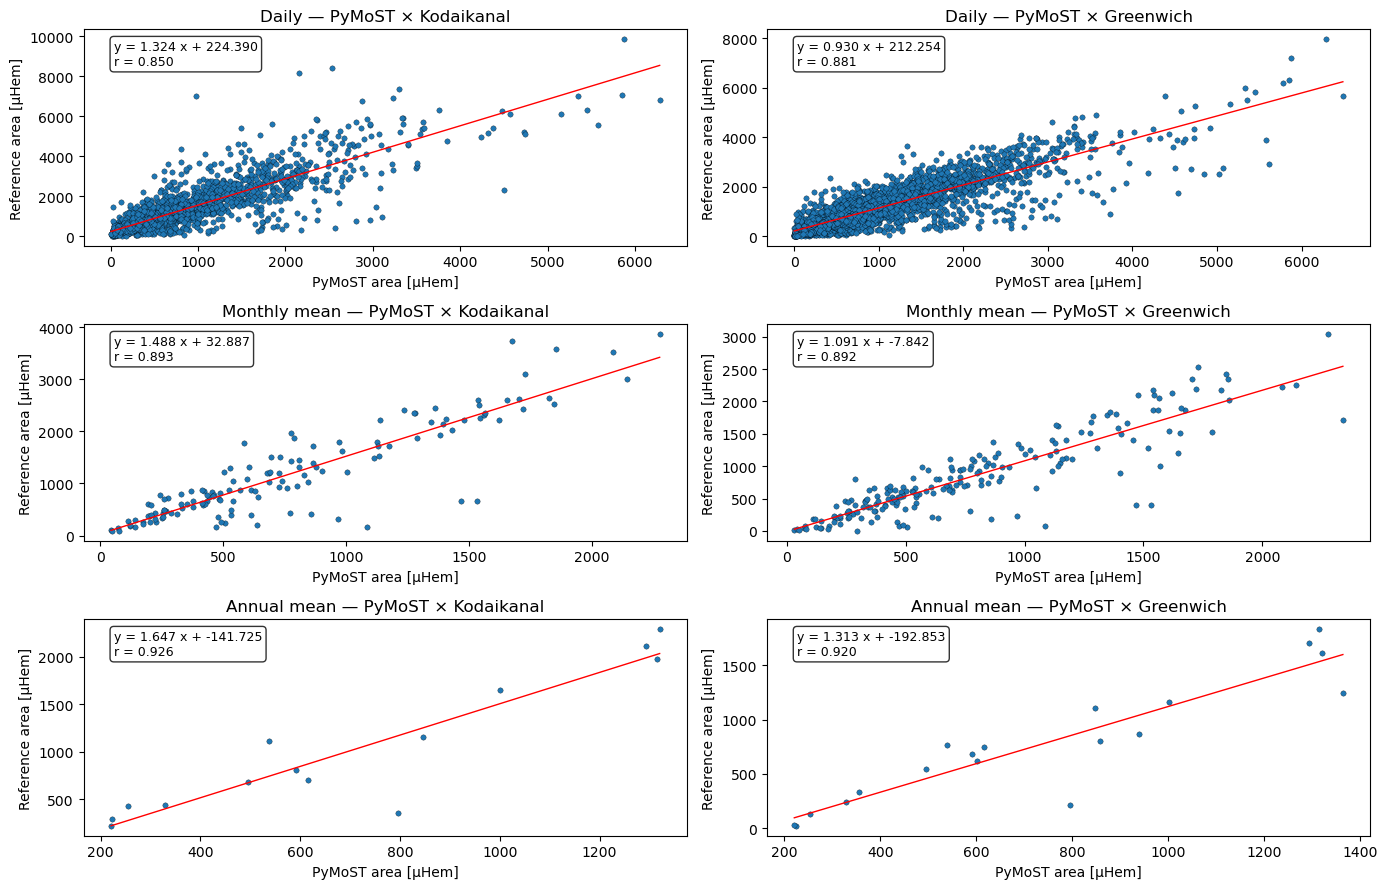

In [8]:
START = pd.Timestamp("1998-01-01")

# =========================
# 1) Ler e preparar dados
# =========================
# PyMoST (Sunspots.csv: Date, Lat, Area)
p = df
p = p.drop_duplicates(subset=["Date", "Lat", "Area"])
p["Date"] = pd.to_datetime(p["Date"], errors="coerce")
p["Lat"]  = pd.to_numeric(p.get("Lat"), errors="coerce")
p["Area"] = pd.to_numeric(p.get("Area"), errors="coerce")
p = p.dropna(subset=["Date", "Lat", "Area"])
p["day"] = p["Date"].dt.normalize()
p = p[p["day"] >= START]

# Kodaikanal (Kodaikanal_diário.txt: t;lo;la;a)
k = pd.read_csv("/home/dario/Documentos/pymost/sample/Kodaikanal_diario.txt", sep=";")
k["Date"] = pd.to_datetime(k["t"].astype(str).str[:10], errors="coerce")
k["Lat"]  = pd.to_numeric(k["la"], errors="coerce")
k["Area"] = pd.to_numeric(k["a"], errors="coerce")
k = k.dropna(subset=["Date", "Lat", "Area"])
k["day"] = k["Date"].dt.normalize()
k = k[k["day"] >= START]

# Greenwich (daily_area_total.txt: YYYY MM DD Total North South)
g = pd.read_csv("/home/dario/Documentos/pymost/sample/daily_area_total.txt", delim_whitespace=True, header=0)
g["YYYY"] = pd.to_numeric(g["YYYY"], errors="coerce").astype("Int64")
g["MM"]   = pd.to_numeric(g["MM"],   errors="coerce").astype("Int64")
g["DD"]   = pd.to_numeric(g["DD"],   errors="coerce").astype("Int64")
g["Date"] = pd.to_datetime(dict(year=g["YYYY"], month=g["MM"], day=g["DD"]), errors="coerce")
g = g.dropna(subset=["Date"])
g["day"] = g["Date"].dt.normalize()
for col in ["Total","North","South"]:
    g[col] = pd.to_numeric(g[col], errors="coerce")
g = g[g["day"] >= START]

# =========================
# 2) Agregar por dia (N, S, Total)
# =========================
def daily_by_hemi(df, lat_col="Lat", area_col="Area", day_col="day"):
    north = df.loc[df[lat_col] >= 0].groupby(day_col)[area_col].sum().rename("North")
    south = df.loc[df[lat_col] <  0].groupby(day_col)[area_col].sum().rename("South")
    total = df.groupby(day_col)[area_col].sum().rename("Total")
    return pd.concat([north, south, total], axis=1).fillna(0.0).sort_index()

p_daily = daily_by_hemi(p)  # PyMoST
k_daily = daily_by_hemi(k)  # Kodaikanal
g_daily = g.set_index("day")[["North","South","Total"]].astype(float).sort_index()  # Greenwich

# =========================
# 3) Mensal (média da área diária) e Anual
# =========================
p_month = p_daily.resample("MS").mean()
k_month = k_daily.resample("MS").mean()
g_month = g_daily.resample("MS").mean()

p_year = p_daily.resample("YS").mean()
k_year = k_daily.resample("YS").mean()
g_year = g_daily.resample("YS").mean()

# =========================
# 4) Funções auxiliares
# =========================
def sanitize_series(s: pd.Series) -> pd.Series:
    """Remove NaN/inf e zera valores <=0 para não afetar correlação."""
    s = pd.to_numeric(s, errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()
    s = s[s > 0]
    return s

def correlation_plot(ax, series_x, series_y, title, color_pts="tab:blue", color_line="red"):
    # limpar NaN/zeros em cada série
    sx = sanitize_series(series_x)
    sy = sanitize_series(series_y)
    # alinhar índices comuns
    df = pd.concat([sx, sy], axis=1, join="inner").dropna()
    if df.empty:
        ax.set_title(title + "\n(no overlap after filtering)")
        ax.set_xlabel("PyMoST area [μHem]")
        ax.set_ylabel("Reference area [μHem]")
        return
    x = df.iloc[:,0].values
    y = df.iloc[:,1].values

    # regressão linear (mínimos quadrados) e correlação de Pearson
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    xline = np.linspace(x.min(), x.max(), 200)
    yline = slope * xline + intercept

    # scatter + linha
    ax.scatter(x, y, alpha=1, s=15, color=color_pts, edgecolor="black", linewidths=0.2)
    ax.plot(xline, yline, color=color_line, lw=1)

    ax.set_title(title)
    ax.set_xlabel("PyMoST area [μHem]")
    ax.set_ylabel("Reference area [μHem]")

    txt = f"y = {slope:.3f} x + {intercept:.3f}\n" \
          f"r = {r_value:.3f}"
    ax.text(0.05, 0.95, txt, transform=ax.transAxes,
            fontsize=9, va="top", ha="left",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# =========================
# 5) Selecionar séries TOTAL para as correlações
# =========================
p_tot_d = p_daily["Total"]
k_tot_d = k_daily["Total"]
g_tot_d = g_daily["Total"]

p_tot_m = p_month["Total"]
k_tot_m = k_month["Total"]
g_tot_m = g_month["Total"]

p_tot_y = p_year["Total"]
k_tot_y = k_year["Total"]
g_tot_y = g_year["Total"]

# =========================
# 6) Figura 3x2 (6 gráficos)
# =========================
fig, axes = plt.subplots(3, 2, figsize=(14, 9))

# Linha 1: diárias
correlation_plot(axes[0,0], p_tot_d, k_tot_d, "Daily — PyMoST × Kodaikanal")
correlation_plot(axes[0,1], p_tot_d, g_tot_d, "Daily — PyMoST × Greenwich")

# Linha 2: mensais
correlation_plot(axes[1,0], p_tot_m, k_tot_m, "Monthly mean — PyMoST × Kodaikanal")
correlation_plot(axes[1,1], p_tot_m, g_tot_m, "Monthly mean — PyMoST × Greenwich")

# Linha 3: anuais
correlation_plot(axes[2,0], p_tot_y, k_tot_y, "Annual mean — PyMoST × Kodaikanal")
correlation_plot(axes[2,1], p_tot_y, g_tot_y, "Annual mean — PyMoST × Greenwich")

plt.tight_layout()
plt.savefig('Fig_11.jpeg', dpi=600, format='jpeg',  bbox_inches='tight')
plt.show()

/tmp/ipykernel_7481/1806222621.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spots["Date"] = pd.to_datetime(spots["Date"], errors="coerce")
/tmp/ipykernel_7481/1806222621.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  groups["Date"] = pd.to_datetime(groups["Date"], errors="coerce")


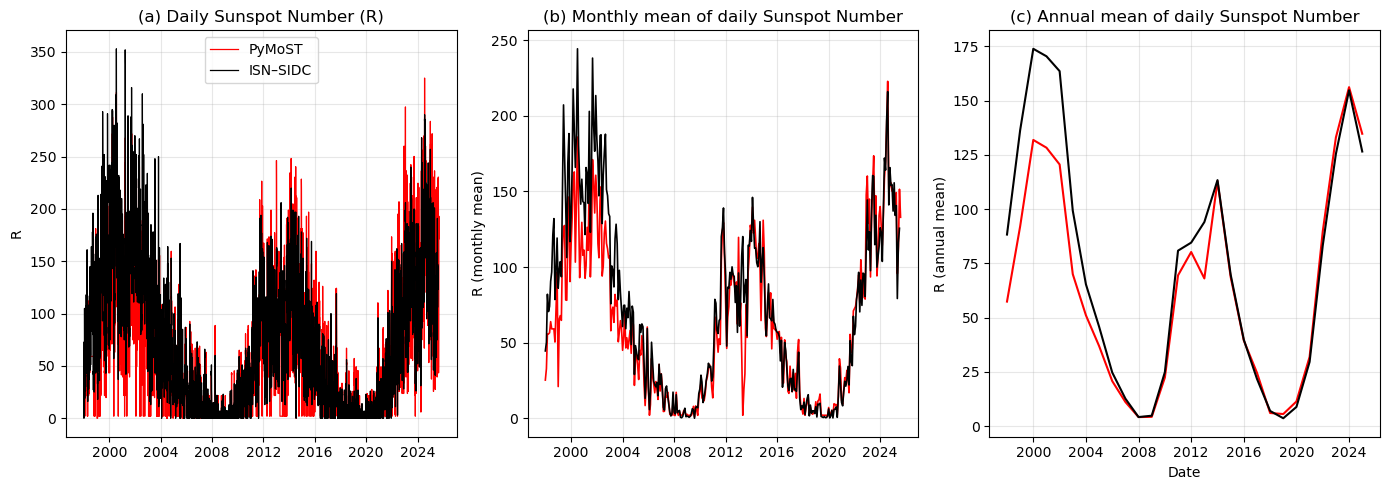

In [9]:
k_factor = 1.97
START = pd.Timestamp("1998-01-01")

# -----------------------------
# PyMoST: R = k (10 g + s)
# -----------------------------
# Sunspots.csv -> manchas individuais por dia (s)
spots = df
spots = spots.drop_duplicates(subset=["Date", "Lat", "Area"])
spots["Date"] = pd.to_datetime(spots["Date"], errors="coerce")
spots = spots.dropna(subset=["Date"])
spots["day"] = spots["Date"].dt.normalize()
s_daily = spots.groupby("day").size().rename("s")

# Groups.csv -> grupos por dia (g)
groups = pd.read_csv("/home/dario/Documentos/pymost/outputs/Groups.csv")
groups["Date"] = pd.to_datetime(groups["Date"], errors="coerce")
groups = groups.dropna(subset=["Date"])
groups["day"] = groups["Date"].dt.normalize()

# Se houver mais de um registro por dia, pegue o "máximo" (ou "primeiro"); ajuste se preferir "sum"
g_daily = groups.groupby("day")["Number_of_Sunspot_Groups"].max().rename("g")

# Combina e calcula R
p_df = pd.concat([g_daily, s_daily], axis=1).fillna(0.0)
p_df["R"] = k_factor * (10 * p_df["g"] + p_df["s"])
p_df = p_df.sort_index()
p_df = p_df[p_df.index >= START]

# -----------------------------
# SIDC / ISN: leitura robusta
# -----------------------------
def load_sidc_daily(path: str) -> pd.DataFrame:
    """
    Lê SN_d_hem_v2.0.* aceitando ; , ou espaços; ignora linhas iniciadas por '#'.
    Retorna DataFrame indexado por 'day' com a coluna 'R' (número diário total).
    """
    cols = ["Year","Month","Day","FracYear","R","RN","RS","StdT","StdN","StdS","NobsT","NobsN","NobsS","Flag"]
    try:
        # formato típico SILSO: ';' e comentários '#'
        sidc = pd.read_csv(path, sep=";", comment="#", header=None, names=cols, engine="python")
    except Exception:
        # fallback: aceita ; , ou espaços
        sidc = pd.read_csv(path, sep=r"[;,\s]+", comment="#", header=None, names=cols, engine="python")

    # limpa linhas não-numéricas e monta a data
    sidc["Year"]  = pd.to_numeric(sidc["Year"],  errors="coerce")
    sidc["Month"] = pd.to_numeric(sidc["Month"], errors="coerce")
    sidc["Day"]   = pd.to_numeric(sidc["Day"],   errors="coerce")
    sidc["R"]     = pd.to_numeric(sidc["R"],     errors="coerce")

    sidc = sidc.dropna(subset=["Year","Month","Day","R"])
    sidc["Year"]  = sidc["Year"].astype(int)
    sidc["Month"] = sidc["Month"].astype(int)
    sidc["Day"]   = sidc["Day"].astype(int)

    sidc["Date"] = pd.to_datetime(
        dict(year=sidc["Year"], month=sidc["Month"], day=sidc["Day"]),
        errors="coerce"
    )
    sidc = sidc.dropna(subset=["Date"])
    sidc["day"] = sidc["Date"].dt.normalize()

    s_df = sidc.set_index("day")[["R"]].astype(float).sort_index()
    s_df = s_df[s_df.index >= START]
    return s_df

s_df = load_sidc_daily("/home/dario/Documentos/pymost/sample/SN_d_hem_V2.0.csv")
assert not s_df.empty, "A série SIDC ficou vazia. Verifique o caminho/sep do arquivo SN_d_hem_v2.0.csv."

# -----------------------------
# Mensal e Anual (média da diária)
# -----------------------------
p_month = p_df["R"].resample("MS").mean()
s_month = s_df["R"].resample("MS").mean()

p_year = p_df["R"].resample("YS").mean()
s_year = s_df["R"].resample("YS").mean()

# -----------------------------
# Gráficos (1 figura, 3 painéis)
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharex=False)

# Diário
axes[0].plot(p_df.index, p_df["R"], color="red",  lw=0.9, label="PyMoST")
axes[0].plot(s_df.index, s_df["R"], color="black", lw=0.9, label="ISN–SIDC")
axes[0].set_title("(a) Daily Sunspot Number (R)")
axes[0].set_ylabel("R")
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Mensal
axes[1].plot(p_month.index, p_month, color="red",  lw=1.2, label="PyMoST")
axes[1].plot(s_month.index, s_month, color="black", lw=1.2, label="ISN–SIDC")
axes[1].set_title("(b) Monthly mean of daily Sunspot Number")
axes[1].set_ylabel("R (monthly mean)")
axes[1].grid(True, alpha=0.3)

# Anual
axes[2].plot(p_year.index, p_year, color="red",  lw=1.5, label="PyMoST")
axes[2].plot(s_year.index, s_year, color="black", lw=1.5, label="ISN–SIDC")
axes[2].set_title("(c) Annual mean of daily Sunspot Number")
axes[2].set_ylabel("R (annual mean)")
axes[2].set_xlabel("Date")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('Fig_12.jpeg', dpi=600, format='jpeg',  bbox_inches='tight')
plt.show()